In [1]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
net = caffe.Net('./demo.prototxt', caffe.TRAIN)

In [12]:
outputs=net.forward()

In [13]:
data=net.blobs['data'].data
label=net.blobs['label'].data
print data.shape,label.shape
print np.unique(label)

(300, 3, 160, 80) (300,)
[ 10089.  10241.  10290.  10291.  10292.  10293.  10295.  10296.  10297.
  10298.  10299.  10450.  10452.  10453.  10454.  10455.  10456.  10457.
  10458.  10510.  10512.  10513.  10514.  10515.  10516.  10517.  10518.
  20057.  20199.  20416.  20440.]


In [14]:
transformer = caffe.io.Transformer({'data': (net.blobs['data'].data.shape)})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.array([ 104.00698793,  116.66876762,  122.67891434])) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

20057.0


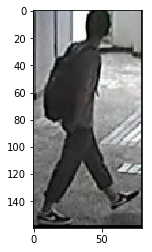

In [15]:
idx=1
img=transformer.deprocess('data',data[idx,:])
# print np.min(img),np.max(img)
# img-=np.min(img)
# img/=np.max(img)
plt.subplot();plt.imshow(img)
print label[idx]

In [7]:
fdsa

NameError: name 'fdsa' is not defined

In [ ]:
from multiprocessing import Process, Queue
import time

def reader(queue):
    ## Read from the queue
    while True:
        msg = queue.get()         # Read from the queue and do nothing
        if (msg == 'DONE'):
            break

def writer(count, queue):
    ## Write to the queue
    for ii in xrange(0, count):
        queue.put(ii)             # Write 'count' numbers into the queue
    queue.put('DONE')

if __name__=='__main__':
    for count in [10**4, 10**5, 10**6]:
        queue = Queue()   # reader() reads from queue
                          # writer() writes to queue
        reader_p = Process(target=reader, args=((queue),))
        reader_p.daemon = True
        reader_p.start()        # Launch reader() as a separate python process

        _start = time.time()
        writer(count, queue)    # Send a lot of stuff to reader()
        reader_p.join()         # Wait for the reader to finish
        print "Sending %s numbers to Queue() took %s seconds" % (count, 
            (time.time() - _start))